In [2]:
#Data Loading and Initial Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('customer_data.csv')
df2 = pd.read_csv('sales_data.csv')

In [2]:
# Quick check to ensure all data content is accurate for dataset d1

# Display the first few rows of dataframe d1
print("First few rows of df1:")
print(df1.head())

# Display a summary of dataframe d1
print("\nSummary of df1:")
print(df1.info())

# Basic statistical summary of d1
print("\nStatistical summary of df1:")
print(df1.describe())

# Quick check to ensure all data content is accurate for dataset d2

# Display the first few rows of dataframe d2
print("\nFirst few rows of df2:")
print(df2.head())

# Display a summary of dataframe d2
print("\nSummary of df2:")
print(df2.info())

# Basic statistical summary of d2
print("\nStatistical summary of df2:")
print(df2.describe())


First few rows of df1:
  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash

Summary of df1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
None

Statistical summary of df1:
                age
count  99338.000000
mean      43.425859
std       14.989400
min       18.000000
25%       30.000000
50%       43.000000
75%       56.000000
max       69.000000

First few rows of df2:
  invoice_no customer_id  category

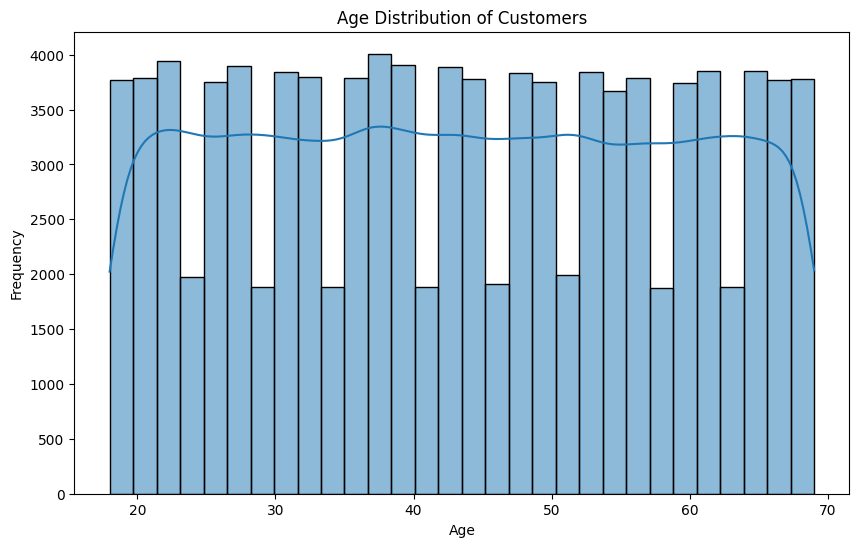

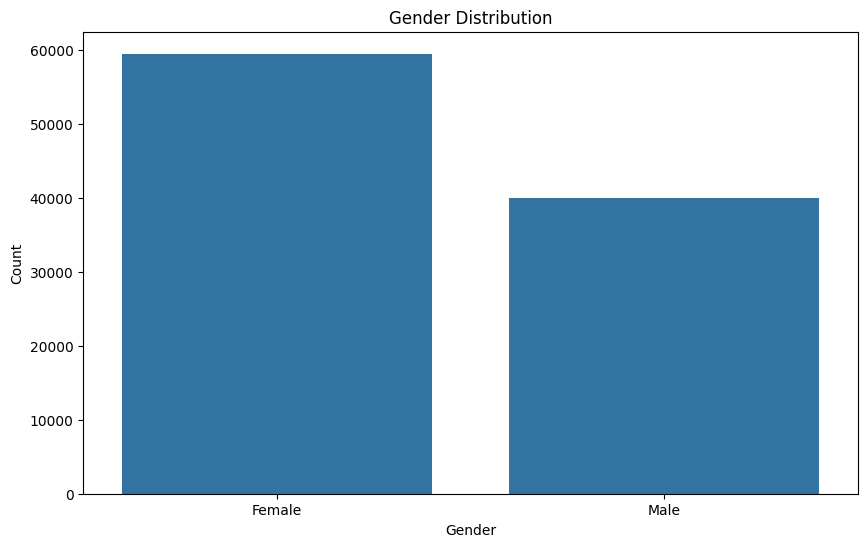

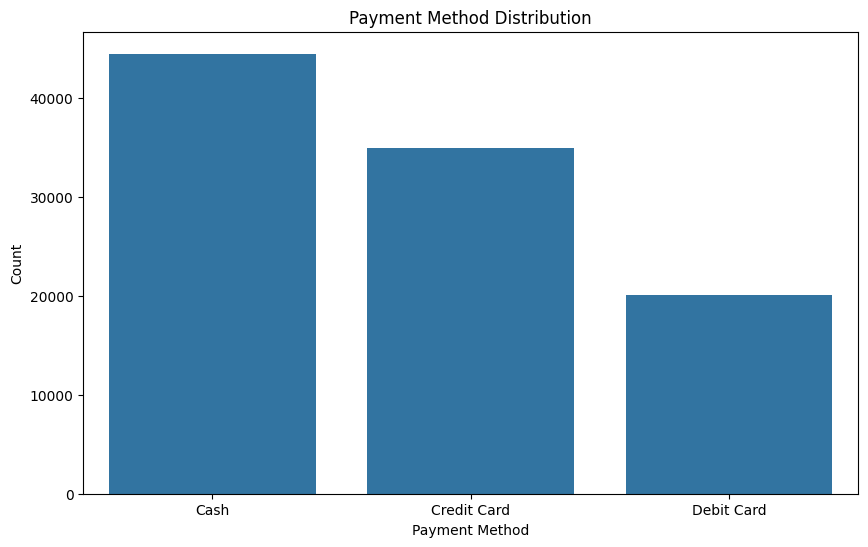

In [3]:
#Exploratory Data Analysis for Df1: 
# Assuming df1 is already loaded
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df1['age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Gender Distribution
gender_counts = df1['gender'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3. Payment Method Distribution
payment_method_counts = df1['payment_method'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()





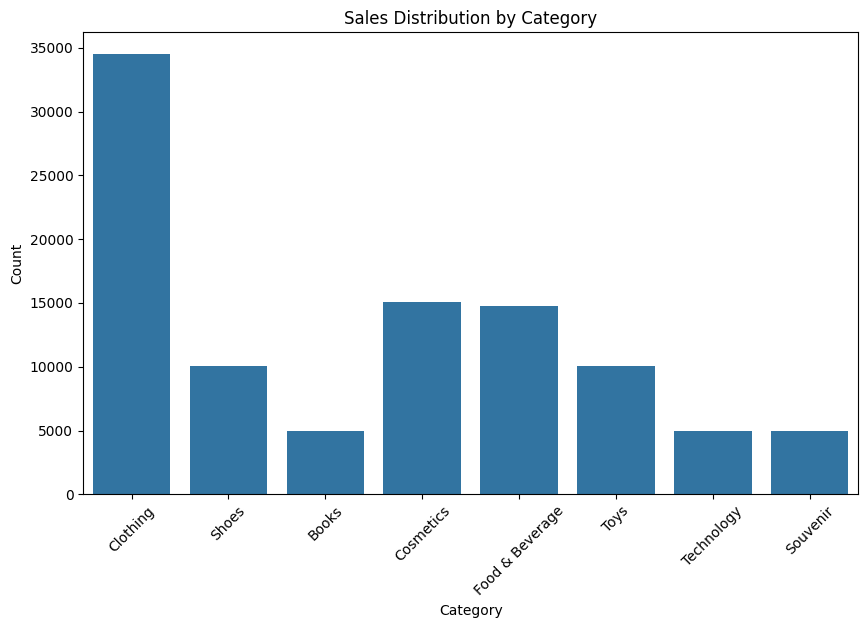

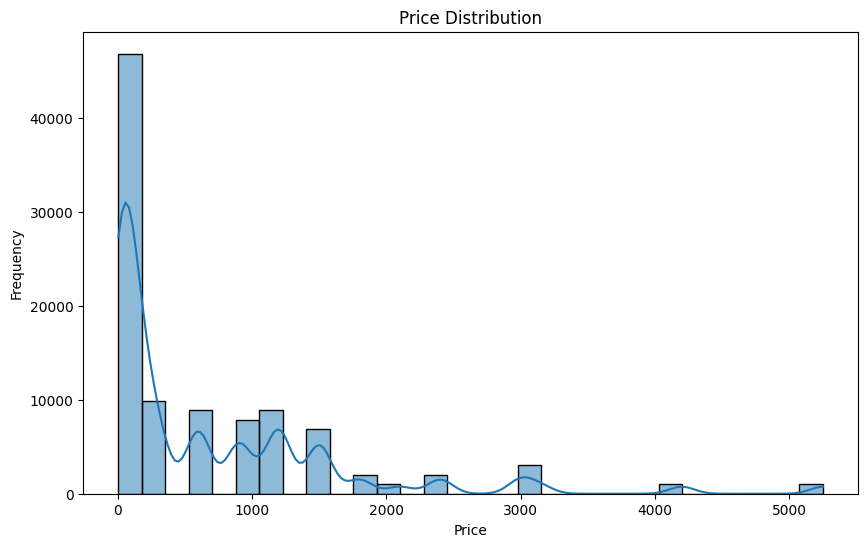

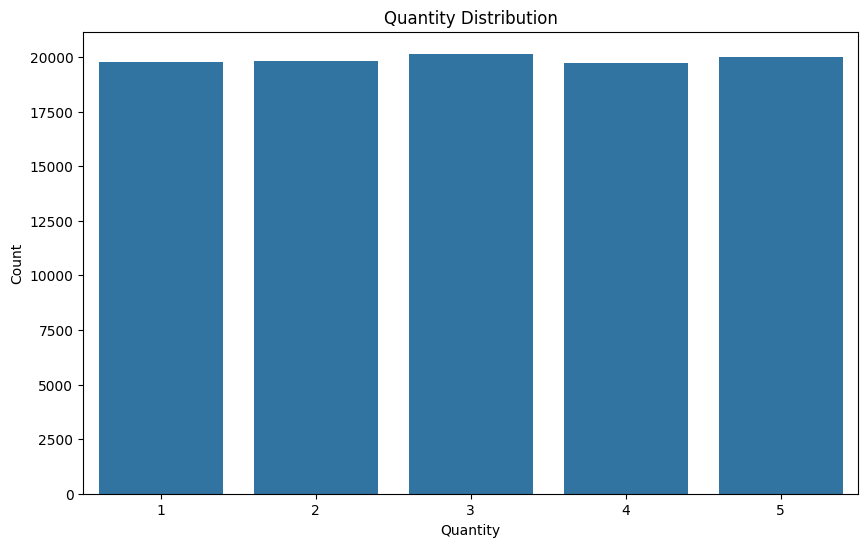

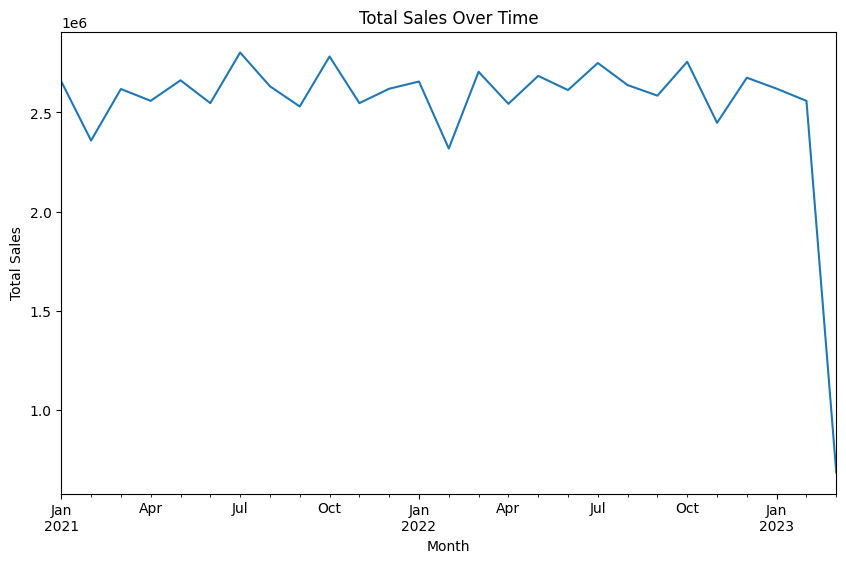

In [4]:
#Exploratory Data Analysis for Df2: 

# Assuming df2 is already loaded and preprocessed
df2['invoice_date'] = pd.to_datetime(df2['invoice_date'], format='%d-%m-%Y')

# 1. Sales Distribution by Category
plt.figure(figsize=(10,6))
sns.countplot(x='category', data=df2)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df2['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 3. Quantity Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='quantity', data=df2)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

# 4. Sales Over Time (requires 'invoice_date' to be in datetime format)
df2['invoice_month'] = df2['invoice_date'].dt.to_period('M')
sales_over_time = df2.groupby('invoice_month')['price'].sum()
sales_over_time.plot(kind='line', figsize=(10,6))
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [5]:
# #Feature Enginnering Selection : 

# From df1 (Customer Data):
# gender: Directly relevant to your analysis.
# age: Also directly relevant.

# From df2 (Purchase Data):
# price: Can indicate the level of spending.
# category: Might show preferences for different types of products.
# quantity: Reflects the volume of purchase.
# total_spent: If not already a feature, you can create this as price * quantity to represent total expenditure per transaction.


  customer_id   age payment_method invoice_no  category  quantity    price  \
0     C241288  28.0    Credit Card    I138884  Clothing       5.0  1500.40   
1     C111565  21.0     Debit Card    I317333     Shoes       3.0  1800.51   
2     C266599  20.0           Cash    I127801  Clothing       1.0   300.08   
3     C988172  66.0    Credit Card    I173702     Shoes       5.0  3000.85   
4     C189076  53.0           Cash    I337046     Books       4.0    60.60   

  invoice_date   shopping_mall gender_categorical  \
0   05-08-2022          Kanyon             Female   
1   12-12-2021  Forum Istanbul               Male   
2   09-11-2021       Metrocity               Male   
3   16-05-2021    Metropol AVM             Female   
4   24-10-2021          Kanyon             Female   

   total_spending_per_customer  gender_Female  gender_Male  
0                      7502.00            1.0          0.0  
1                      5401.53            0.0          1.0  
2                       300.0

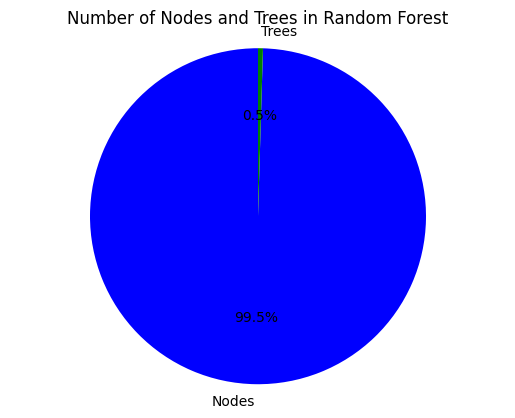

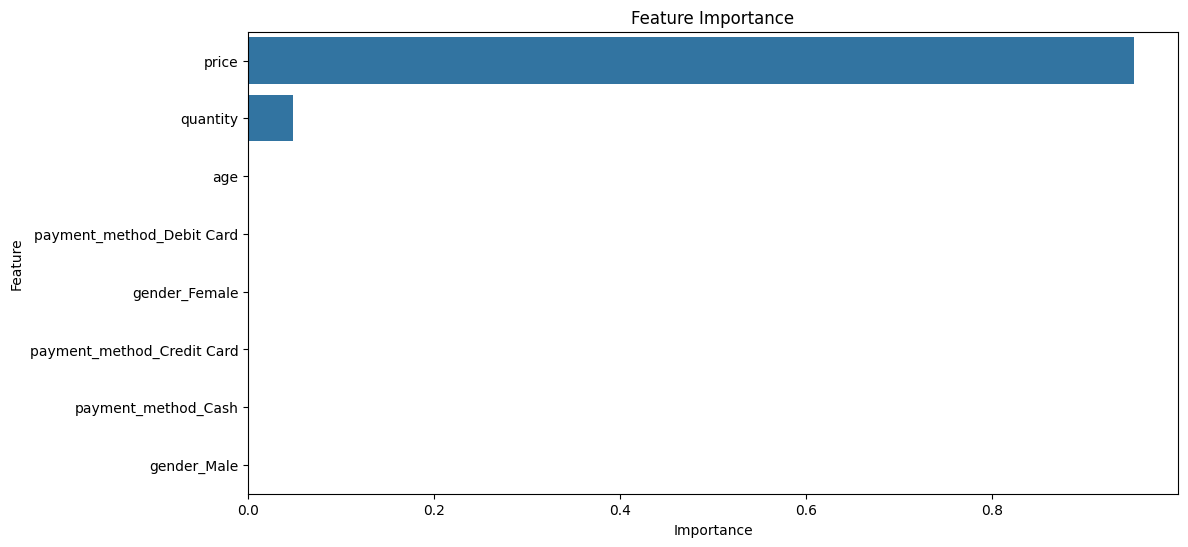

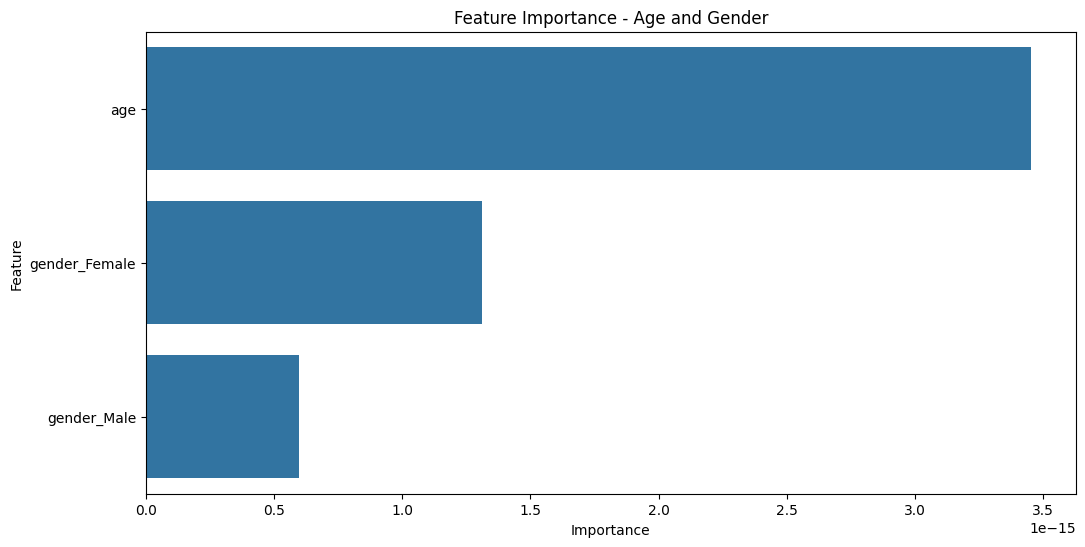

Insights:
         Feature    Importance
0            age  3.454343e-15
3  gender_Female  1.310763e-15
4    gender_Male  5.978938e-16

Total Spending by Gender:
gender_categorical
Female    $150207136.02
Male      $101298658.23
Name: total_spending_per_customer, dtype: object

Total Spending by Age Group:
age_group
18-25    $33680374.15 Spending
26-35    $47826744.49 Spending
36-50    $74410409.30 Spending
51+      $91193246.77 Spending
Name: total_spending_per_customer, dtype: object


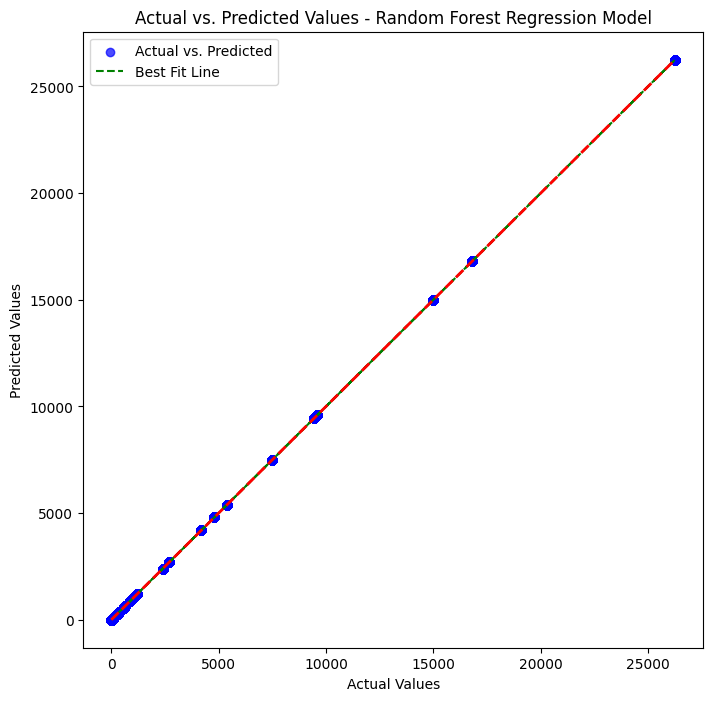

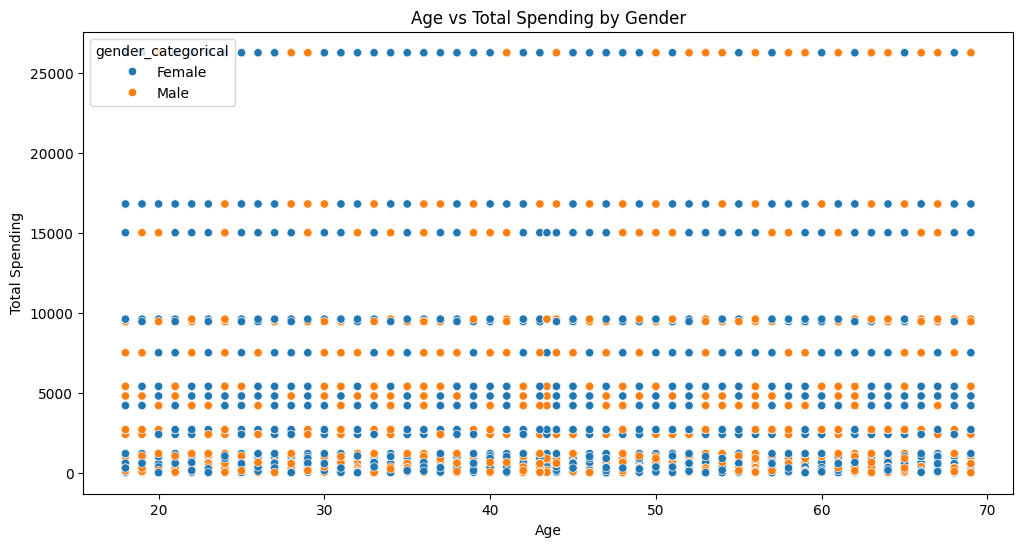

In [13]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

def plot_nodes_and_trees_pie(rf_model):
    # Get the number of nodes for each tree in the forest
    num_nodes = [tree.tree_.node_count for tree in rf_model.estimators_]

    # Get the total number of nodes and trees
    total_nodes = sum(num_nodes)
    total_trees = len(rf_model.estimators_)

    # Create a pie chart
    fig, ax = plt.subplots()
    ax.pie([total_nodes, total_trees], labels=['Nodes', 'Trees'], autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
    ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

    ax.set_title('Number of Nodes and Trees in Random Forest')

    plt.show()

def plot_age_gender_vs_price(aggregated_df):
    # Plotting age vs total spending
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.scatterplot(x='age', y='total_spending_per_customer', hue='gender_categorical', data=aggregated_df, ax=ax)
    ax.set_title('Age vs Total Spending by Gender')
    ax.set_xlabel('Age')
    ax.set_ylabel('Total Spending')
    plt.show()


def plot_feature_importance(model, preprocessor, encoder, categorical_columns):
    # Fit the preprocessor and encoder to get the transformed feature names
    preprocessor.fit(aggregated_df.drop(['total_spending_per_customer'], axis=1))
    encoder.fit(aggregated_df[categorical_columns])

    # Get transformed feature names
    transformed_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))

    # Combine numeric and categorical feature names
    feature_names = list(aggregated_df.drop(['total_spending_per_customer'], axis=1).select_dtypes(include=['number']).columns) + transformed_feature_names

    # Ensure the length of feature names matches the number of importances
    if len(feature_names) != len(model.feature_importances_):
        raise ValueError("Length of feature names does not match the number of importances.")

    # Get feature importances
    feature_importance = model.feature_importances_

    # Create a DataFrame with feature names and importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, ax=ax)
    ax.set_title('Feature Importance')
    plt.show()

    # Filter features related to age and gender
    age_gender_features = ['age', 'gender_Female', 'gender_Male']
    age_gender_importance = feature_importance_df[feature_importance_df['Feature'].isin(age_gender_features)]

    # Plot the feature importances for age and gender
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=age_gender_importance, ax=ax)
    ax.set_title('Feature Importance - Age and Gender')
    plt.show()

    # Print insights
    print("Insights:")
    print(age_gender_importance)

    # Analyze who buys more (male or female)
    total_spending_by_gender = aggregated_df.groupby('gender_categorical')['total_spending_per_customer'].sum()
    print("\nTotal Spending by Gender:")
    print(total_spending_by_gender.apply(lambda x: f"${x:.2f}"))

    # Analyze which age group buys more
    age_bins = [18, 25, 35, 50, 100]  # Define your desired age bins
    aggregated_df['age_group'] = pd.cut(aggregated_df['age'], bins=age_bins, labels=['18-25', '26-35', '36-50', '51+'])
    total_spending_by_age_group = aggregated_df.groupby('age_group')['total_spending_per_customer'].sum()
    print("\nTotal Spending by Age Group:")
    print(total_spending_by_age_group.apply(lambda x: f"${x:.2f} Spending"))



# Plot Predicted vs. Actual Values
def plot_predicted_vs_actual(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Scatter plot for actual vs. predicted values
    ax.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted', alpha=0.7)
    
    # Calculate the best-fit line
    best_fit_line = np.polyfit(y_test, y_pred, 1)
    line = np.poly1d(best_fit_line)
    
    # Plot the best-fit line
    ax.plot(y_test, line(y_test), color='green', linestyle='--', label='Best Fit Line')
    
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title('Actual vs. Predicted Values - Random Forest Regression Model')
    ax.legend()
    
    # Add a diagonal line for reference
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
    
    plt.show()

# Assuming df1 and df2 are already loaded

# Merge df1 and df2 on 'customer_id'
aggregated_df = pd.merge(df1, df2, on='customer_id', how='inner')


# Make a copy of the 'gender' column before mapping
aggregated_df['gender_categorical'] = aggregated_df['gender']
categorical_column = ['gender']

# Applying OneHotEncoder to the 'gender' column
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(aggregated_df[categorical_column])

# Creating a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_column))

# Dropping the original 'gender' column from aggregated_df
aggregated_df = aggregated_df.drop(categorical_column, axis=1)

# Feature engineering: total spending per customer
aggregated_df['total_spending_per_customer'] = aggregated_df.groupby('customer_id')['price'].transform('sum')

# Concatenating the encoded data with the original dataframe
aggregated_df = pd.concat([aggregated_df, encoded_df], axis=1)

# Impute missing values in numeric columns
numeric_columns = aggregated_df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns[numeric_columns != 'total_spending_per_customer']  # Exclude the target column
imputer = SimpleImputer(strategy='mean')
aggregated_df[numeric_columns] = imputer.fit_transform(aggregated_df[numeric_columns])
aggregated_df['total_spending_per_customer'] = aggregated_df['price'] * aggregated_df['quantity']

# Display the first few rows of the updated dataframe
print(aggregated_df.head())

# Handling categorical data with OneHotEncoding
categorical_columns = ['payment_method']  # Update this list based on your actual categorical columns
numeric_columns = aggregated_df.drop(['total_spending_per_customer'], axis=1).select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply OneHotEncoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply the transformations to the feature set
X = preprocessor.fit_transform(aggregated_df.drop(['total_spending_per_customer'], axis=1))

# Target variable
y = aggregated_df['total_spending_per_customer']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plot_nodes_and_trees_pie(rf_regressor)


# Plot Feature Importance
plot_feature_importance(rf_regressor, preprocessor, encoder, categorical_columns)

# Plot Predicted vs. Actual Values
plot_predicted_vs_actual(y_test, y_pred)

plot_age_gender_vs_price(aggregated_df)

